In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

C:\Users\ROHITH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the data

In [2]:
df = pd.read_csv("auto-mpg.data",names=['MPG', 'Cylinders', 'Displacements', 'Horsepower', 'Weight',
              'Acceleration', 'Year', 'Origin', 'Car_name'], delim_whitespace = True)
print("Shape of df :",df.shape)
df.head()

Shape of df : (406, 9)


,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin,Car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


Here we can see that the Car_name also includes the Car manufacturer as the first word.So we can extract that to find the any relation with the MPG

In [3]:
model = []
for x in df["Car_name"]:
    x = x.split()
    model.append(x[0])        

In [4]:
df["Manufacturer"] = model
df.head()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin,Car_name,Manufacturer
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford


In [5]:
#Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MPG            398 non-null    float64
 1   Cylinders      406 non-null    float64
 2   Displacements  406 non-null    float64
 3   Horsepower     400 non-null    float64
 4   Weight         406 non-null    float64
 5   Acceleration   406 non-null    float64
 6   Year           406 non-null    float64
 7   Origin         406 non-null    float64
 8   Car_name       406 non-null    object 
 9   Manufacturer   406 non-null    object 
dtypes: float64(8), object(2)
memory usage: 31.8+ KB


In [6]:
df["Manufacturer"].value_counts()

ford             53
chevrolet        44
plymouth         32
amc              29
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       16
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
volvo             6
vw                6
chrysler          6
renault           5
saab              5
subaru            4
opel              4
chevy             3
cadillac          2
maxda             2
bmw               2
mercedes-benz     2
triumph           1
nissan            1
vokswagen         1
capri             1
hi                1
toyouta           1
citroen           1
mercedes          1
chevroelt         1
Name: Manufacturer, dtype: int64

In [7]:
brand = df.dropna(subset=["MPG"])
brand = df['Manufacturer'].value_counts()[:5]
brand = list(brand.index)                 

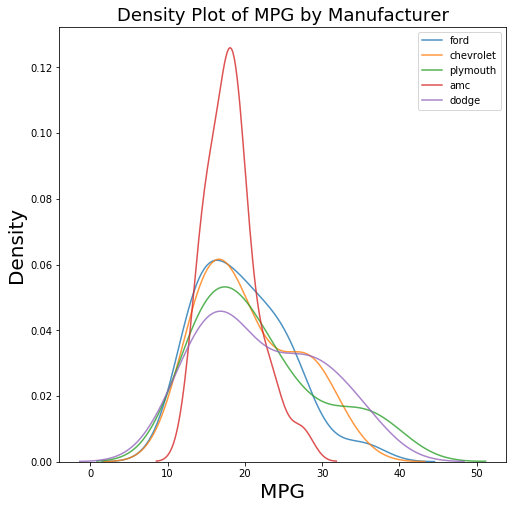

In [8]:
#Plot of distribution of MPG for Manufacturer
from IPython.core.pylabtools import figsize
figsize(8,8)

# Plot each manufacturer
for c_brand in brand:
    # Select the manufacturer
    subset = df[df['Manufacturer'] == c_brand]
    
    # Density plot of mpg
    sns.kdeplot(subset['MPG'].dropna(),
               label = c_brand, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MPG', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot of MPG by Manufacturer', size = 18)
plt.show()

Most of the top Manufacturer has the density plot overlapping so that the difference might not be significant.

## Exploratory Data Analysis

In [9]:
#checking for null values
df.isnull().sum()

MPG              8
Cylinders        0
Displacements    0
Horsepower       6
Weight           0
Acceleration     0
Year             0
Origin           0
Car_name         0
Manufacturer     0
dtype: int64

In [10]:
#removing the null values
df = df.dropna()
df.isnull().sum()

MPG              0
Cylinders        0
Displacements    0
Horsepower       0
Weight           0
Acceleration     0
Year             0
Origin           0
Car_name         0
Manufacturer     0
dtype: int64

In [11]:
#summary of the statistics
df.describe()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
#lets drop the unwanted columns in building the model
df = df.drop('Car_name',axis=1)
df = df.drop('Manufacturer',axis=1)

## Single Variable Plot

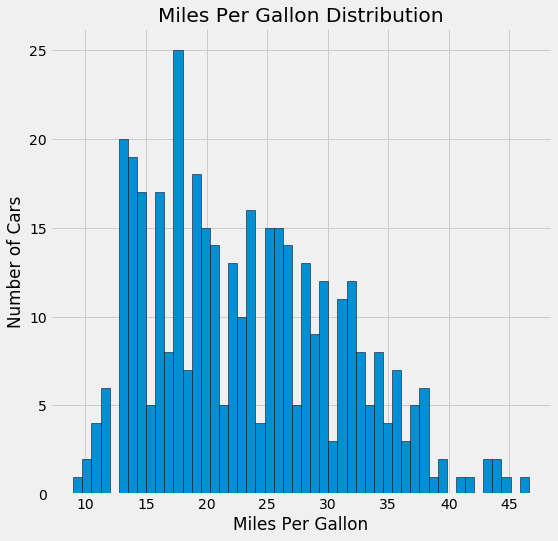

In [13]:
#MPG distribution among the cars 
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df["MPG"].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('Miles Per Gallon'); plt.ylabel('Number of Cars'); 
plt.title('Miles Per Gallon Distribution');
plt.show()

From this above plot we can see that most of the cars in our dataset has MPG around 15 to 30. 

## Correlation between our features and targets

To check the correlation we will use the pearson correlation coefficient.

In [14]:
corr_df = df.corr()
corr_df["MPG"].sort_values(ascending=False)

MPG              1.000000
Year             0.580541
Origin           0.565209
Acceleration     0.423329
Cylinders       -0.777618
Horsepower      -0.778427
Displacements   -0.805127
Weight          -0.832244
Name: MPG, dtype: float64

As we can see that there are several strong correlations between the MPG and other variables.

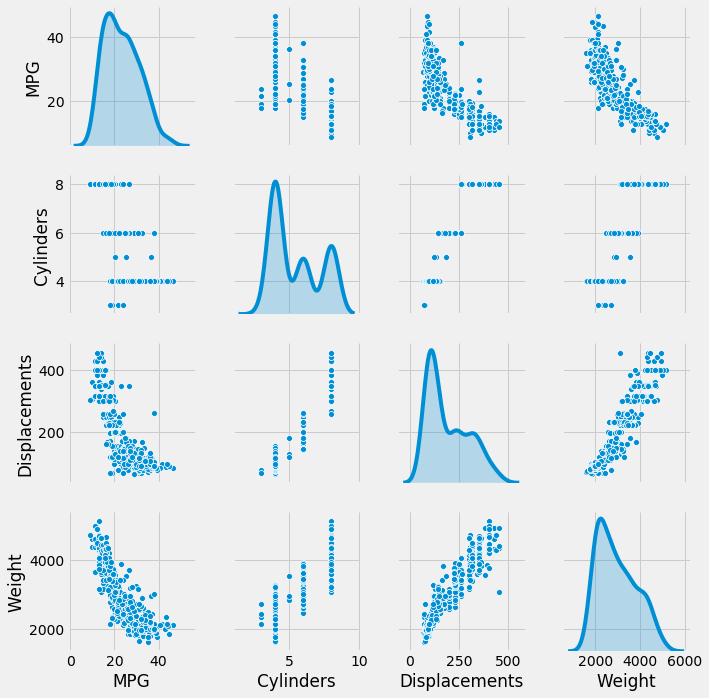

In [15]:
#Inspect the data
sns.pairplot(df[["MPG", 'Cylinders', 'Displacements', 'Weight']], diag_kind='kde')

From the above pairplot we can see that the MPG is having a negative relation with respect to displacement and weight.
Also we can see that Displacement and Weight is having a linear relation.

## Splitting the data into Training and Testing set

In [16]:
X=df.drop("MPG",axis=1)
y=df['MPG']
print("Shape of features :",X.shape)
print("Shape of labels :",y.shape)

Shape of features : (392, 7)
Shape of labels : (392,)


In [17]:
X

,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [18]:
#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()

,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin
227,4.0,85.0,70.0,1945.0,16.8,77.0,3.0
263,6.0,225.0,100.0,3430.0,17.2,78.0,1.0
308,4.0,105.0,70.0,2200.0,13.2,79.0,1.0
200,6.0,200.0,81.0,3012.0,17.6,76.0,1.0
64,4.0,113.0,95.0,2278.0,15.5,72.0,3.0


## Data Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [20]:
#Saving the sc transform
pickle.dump(sc, open('scaler.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [21]:
X_train.keys()

Index(['Cylinders', 'Displacements', 'Horsepower', 'Weight', 'Acceleration',
       'Year', 'Origin'],
      dtype='object')

In [22]:
len(X_train.keys())

7

In [23]:
from keras.models import Sequential
from keras.layers import Dense 
# Initialising the ANN
model = Sequential()

# Adding the input layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the hidden layers
model.add(Dense(units = 64,activation='relu'))
# Adding the output layer
model.add(Dense(units=1))          
          
# Compiling the ANN 
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [25]:
model_history=model.fit(X_train_std, y_train, batch_size =100,epochs = 1000)


Epoch 1/1000
313/313 [==============================] - 0s 399us/step - loss: 603.7193 - mean_absolute_error: 23.3563 - mean_squared_error: 603.7193
Epoch 2/1000
313/313 [==============================] - 0s 19us/step - loss: 588.8509 - mean_absolute_error: 23.0544 - mean_squared_error: 588.8509
Epoch 3/1000
313/313 [==============================] - 0s 25us/step - loss: 573.0113 - mean_absolute_error: 22.7364 - mean_squared_error: 573.0114
Epoch 4/1000
313/313 [==============================] - 0s 16us/step - loss: 556.4669 - mean_absolute_error: 22.3983 - mean_squared_error: 556.4669
Epoch 5/1000
313/313 [==============================] - 0s 29us/step - loss: 538.7188 - mean_absolute_error: 22.0306 - mean_squared_error: 538.7188
Epoch 6/1000
313/313 [==============================] - 0s 26us/step - loss: 519.2133 - mean_absolute_error: 21.6219 - mean_squared_error: 519.2133
Epoch 7/1000
313/313 [==============================] - 0s 16us/step - loss: 498.1627 - mean_absolute_error: 2

313/313 [==============================] - 0s 13us/step - loss: 14.2235 - mean_absolute_error: 2.8782 - mean_squared_error: 14.2235
Epoch 56/1000
313/313 [==============================] - 0s 13us/step - loss: 14.0296 - mean_absolute_error: 2.8506 - mean_squared_error: 14.0296
Epoch 57/1000
313/313 [==============================] - 0s 13us/step - loss: 13.8459 - mean_absolute_error: 2.8237 - mean_squared_error: 13.8459
Epoch 58/1000
313/313 [==============================] - 0s 13us/step - loss: 13.6883 - mean_absolute_error: 2.8015 - mean_squared_error: 13.6883
Epoch 59/1000
313/313 [==============================] - 0s 16us/step - loss: 13.5067 - mean_absolute_error: 2.7842 - mean_squared_error: 13.5067
Epoch 60/1000
313/313 [==============================] - 0s 10us/step - loss: 13.3789 - mean_absolute_error: 2.7722 - mean_squared_error: 13.3789
Epoch 61/1000
313/313 [==============================] - 0s 13us/step - loss: 13.2322 - mean_absolute_error: 2.7510 - mean_squared_error: 

313/313 [==============================] - 0s 19us/step - loss: 9.9198 - mean_absolute_error: 2.2853 - mean_squared_error: 9.9198
Epoch 112/1000
313/313 [==============================] - 0s 13us/step - loss: 9.8121 - mean_absolute_error: 2.2692 - mean_squared_error: 9.8121
Epoch 113/1000
313/313 [==============================] - 0s 16us/step - loss: 9.7419 - mean_absolute_error: 2.2570 - mean_squared_error: 9.7419
Epoch 114/1000
313/313 [==============================] - 0s 13us/step - loss: 9.7013 - mean_absolute_error: 2.2467 - mean_squared_error: 9.7013
Epoch 115/1000
313/313 [==============================] - 0s 16us/step - loss: 9.6948 - mean_absolute_error: 2.2419 - mean_squared_error: 9.6948
Epoch 116/1000
313/313 [==============================] - 0s 13us/step - loss: 9.6709 - mean_absolute_error: 2.2359 - mean_squared_error: 9.6709
Epoch 117/1000
313/313 [==============================] - 0s 13us/step - loss: 9.6307 - mean_absolute_error: 2.2274 - mean_squared_error: 9.6307


313/313 [==============================] - 0s 13us/step - loss: 8.2390 - mean_absolute_error: 2.0548 - mean_squared_error: 8.2390
Epoch 168/1000
313/313 [==============================] - 0s 16us/step - loss: 8.1960 - mean_absolute_error: 2.0468 - mean_squared_error: 8.1960
Epoch 169/1000
313/313 [==============================] - 0s 13us/step - loss: 8.1835 - mean_absolute_error: 2.0425 - mean_squared_error: 8.1835
Epoch 170/1000
313/313 [==============================] - 0s 13us/step - loss: 8.1764 - mean_absolute_error: 2.0416 - mean_squared_error: 8.1764
Epoch 171/1000
313/313 [==============================] - 0s 13us/step - loss: 8.1814 - mean_absolute_error: 2.0418 - mean_squared_error: 8.1814
Epoch 172/1000
313/313 [==============================] - 0s 13us/step - loss: 8.1660 - mean_absolute_error: 2.0433 - mean_squared_error: 8.1660
Epoch 173/1000
313/313 [==============================] - 0s 16us/step - loss: 8.1418 - mean_absolute_error: 2.0420 - mean_squared_error: 8.1418


313/313 [==============================] - 0s 19us/step - loss: 7.4757 - mean_absolute_error: 1.9483 - mean_squared_error: 7.4757
Epoch 224/1000
313/313 [==============================] - 0s 13us/step - loss: 7.4027 - mean_absolute_error: 1.9387 - mean_squared_error: 7.4027
Epoch 225/1000
313/313 [==============================] - 0s 25us/step - loss: 7.4216 - mean_absolute_error: 1.9373 - mean_squared_error: 7.4216
Epoch 226/1000
313/313 [==============================] - 0s 13us/step - loss: 7.3851 - mean_absolute_error: 1.9329 - mean_squared_error: 7.3851
Epoch 227/1000
313/313 [==============================] - 0s 22us/step - loss: 7.3582 - mean_absolute_error: 1.9354 - mean_squared_error: 7.3582
Epoch 228/1000
313/313 [==============================] - 0s 19us/step - loss: 7.3845 - mean_absolute_error: 1.9404 - mean_squared_error: 7.3845
Epoch 229/1000
313/313 [==============================] - 0s 10us/step - loss: 7.4202 - mean_absolute_error: 1.9464 - mean_squared_error: 7.4202


313/313 [==============================] - 0s 13us/step - loss: 6.8694 - mean_absolute_error: 1.8843 - mean_squared_error: 6.8694
Epoch 280/1000
313/313 [==============================] - 0s 13us/step - loss: 6.8599 - mean_absolute_error: 1.8885 - mean_squared_error: 6.8599
Epoch 281/1000
313/313 [==============================] - 0s 13us/step - loss: 6.8548 - mean_absolute_error: 1.8891 - mean_squared_error: 6.8548
Epoch 282/1000
313/313 [==============================] - 0s 10us/step - loss: 6.8477 - mean_absolute_error: 1.8888 - mean_squared_error: 6.8477
Epoch 283/1000
313/313 [==============================] - 0s 13us/step - loss: 6.8639 - mean_absolute_error: 1.8954 - mean_squared_error: 6.8639
Epoch 284/1000
313/313 [==============================] - 0s 16us/step - loss: 6.8430 - mean_absolute_error: 1.8897 - mean_squared_error: 6.8430
Epoch 285/1000
313/313 [==============================] - 0s 13us/step - loss: 6.7814 - mean_absolute_error: 1.8707 - mean_squared_error: 6.7814


313/313 [==============================] - 0s 13us/step - loss: 6.3513 - mean_absolute_error: 1.8143 - mean_squared_error: 6.3513
Epoch 336/1000
313/313 [==============================] - 0s 13us/step - loss: 6.3108 - mean_absolute_error: 1.8051 - mean_squared_error: 6.3108
Epoch 337/1000
313/313 [==============================] - 0s 13us/step - loss: 6.3014 - mean_absolute_error: 1.7998 - mean_squared_error: 6.3014
Epoch 338/1000
313/313 [==============================] - 0s 13us/step - loss: 6.2973 - mean_absolute_error: 1.7956 - mean_squared_error: 6.2973
Epoch 339/1000
313/313 [==============================] - 0s 16us/step - loss: 6.3380 - mean_absolute_error: 1.7949 - mean_squared_error: 6.3380
Epoch 340/1000
313/313 [==============================] - 0s 13us/step - loss: 6.3124 - mean_absolute_error: 1.7906 - mean_squared_error: 6.3124
Epoch 341/1000
313/313 [==============================] - 0s 13us/step - loss: 6.2595 - mean_absolute_error: 1.7838 - mean_squared_error: 6.2595


313/313 [==============================] - 0s 13us/step - loss: 5.8459 - mean_absolute_error: 1.7456 - mean_squared_error: 5.8459
Epoch 392/1000
313/313 [==============================] - 0s 13us/step - loss: 5.8646 - mean_absolute_error: 1.7538 - mean_squared_error: 5.8646
Epoch 393/1000
313/313 [==============================] - 0s 10us/step - loss: 5.8690 - mean_absolute_error: 1.7487 - mean_squared_error: 5.8690
Epoch 394/1000
313/313 [==============================] - 0s 16us/step - loss: 5.8363 - mean_absolute_error: 1.7395 - mean_squared_error: 5.8363
Epoch 395/1000
313/313 [==============================] - 0s 13us/step - loss: 5.8283 - mean_absolute_error: 1.7374 - mean_squared_error: 5.8283
Epoch 396/1000
313/313 [==============================] - 0s 13us/step - loss: 5.8108 - mean_absolute_error: 1.7386 - mean_squared_error: 5.8108
Epoch 397/1000
313/313 [==============================] - 0s 16us/step - loss: 5.8044 - mean_absolute_error: 1.7385 - mean_squared_error: 5.8044


313/313 [==============================] - 0s 16us/step - loss: 5.4252 - mean_absolute_error: 1.6763 - mean_squared_error: 5.4252
Epoch 448/1000
313/313 [==============================] - 0s 13us/step - loss: 5.3949 - mean_absolute_error: 1.6710 - mean_squared_error: 5.3949
Epoch 449/1000
313/313 [==============================] - 0s 13us/step - loss: 5.4240 - mean_absolute_error: 1.6637 - mean_squared_error: 5.4240
Epoch 450/1000
313/313 [==============================] - 0s 22us/step - loss: 5.4166 - mean_absolute_error: 1.6686 - mean_squared_error: 5.4166
Epoch 451/1000
313/313 [==============================] - 0s 16us/step - loss: 5.4354 - mean_absolute_error: 1.6694 - mean_squared_error: 5.4354
Epoch 452/1000
313/313 [==============================] - 0s 19us/step - loss: 5.4253 - mean_absolute_error: 1.6728 - mean_squared_error: 5.4253
Epoch 453/1000
313/313 [==============================] - 0s 19us/step - loss: 5.3984 - mean_absolute_error: 1.6711 - mean_squared_error: 5.3984


313/313 [==============================] - 0s 19us/step - loss: 5.0432 - mean_absolute_error: 1.6155 - mean_squared_error: 5.0432
Epoch 504/1000
313/313 [==============================] - 0s 16us/step - loss: 5.0644 - mean_absolute_error: 1.6222 - mean_squared_error: 5.0644
Epoch 505/1000
313/313 [==============================] - 0s 13us/step - loss: 5.0607 - mean_absolute_error: 1.6197 - mean_squared_error: 5.0607
Epoch 506/1000
313/313 [==============================] - 0s 16us/step - loss: 5.0663 - mean_absolute_error: 1.6178 - mean_squared_error: 5.0663
Epoch 507/1000
313/313 [==============================] - 0s 10us/step - loss: 5.0878 - mean_absolute_error: 1.6222 - mean_squared_error: 5.0878
Epoch 508/1000
313/313 [==============================] - 0s 22us/step - loss: 5.0050 - mean_absolute_error: 1.6073 - mean_squared_error: 5.0050
Epoch 509/1000
313/313 [==============================] - 0s 16us/step - loss: 5.0219 - mean_absolute_error: 1.6099 - mean_squared_error: 5.0219


313/313 [==============================] - 0s 16us/step - loss: 4.8115 - mean_absolute_error: 1.5689 - mean_squared_error: 4.8115
Epoch 560/1000
313/313 [==============================] - 0s 16us/step - loss: 4.8263 - mean_absolute_error: 1.5581 - mean_squared_error: 4.8263
Epoch 561/1000
313/313 [==============================] - 0s 16us/step - loss: 4.8414 - mean_absolute_error: 1.5654 - mean_squared_error: 4.8414
Epoch 562/1000
313/313 [==============================] - 0s 16us/step - loss: 4.8018 - mean_absolute_error: 1.5590 - mean_squared_error: 4.8018
Epoch 563/1000
313/313 [==============================] - 0s 13us/step - loss: 4.8551 - mean_absolute_error: 1.5725 - mean_squared_error: 4.8551
Epoch 564/1000
313/313 [==============================] - 0s 19us/step - loss: 4.9068 - mean_absolute_error: 1.5831 - mean_squared_error: 4.9068
Epoch 565/1000
313/313 [==============================] - 0s 13us/step - loss: 4.8447 - mean_absolute_error: 1.5684 - mean_squared_error: 4.8447


313/313 [==============================] - 0s 16us/step - loss: 4.5267 - mean_absolute_error: 1.5154 - mean_squared_error: 4.5267
Epoch 616/1000
313/313 [==============================] - 0s 16us/step - loss: 4.5099 - mean_absolute_error: 1.5157 - mean_squared_error: 4.5099
Epoch 617/1000
313/313 [==============================] - 0s 19us/step - loss: 4.5607 - mean_absolute_error: 1.5283 - mean_squared_error: 4.5607
Epoch 618/1000
313/313 [==============================] - 0s 13us/step - loss: 4.7213 - mean_absolute_error: 1.5471 - mean_squared_error: 4.7213
Epoch 619/1000
313/313 [==============================] - 0s 16us/step - loss: 4.6979 - mean_absolute_error: 1.5351 - mean_squared_error: 4.6979
Epoch 620/1000
313/313 [==============================] - 0s 13us/step - loss: 4.5498 - mean_absolute_error: 1.5232 - mean_squared_error: 4.5498
Epoch 621/1000
313/313 [==============================] - 0s 16us/step - loss: 4.5419 - mean_absolute_error: 1.5159 - mean_squared_error: 4.5419


313/313 [==============================] - 0s 13us/step - loss: 4.3909 - mean_absolute_error: 1.4971 - mean_squared_error: 4.3909
Epoch 672/1000
313/313 [==============================] - 0s 13us/step - loss: 4.3668 - mean_absolute_error: 1.4922 - mean_squared_error: 4.3668
Epoch 673/1000
313/313 [==============================] - 0s 16us/step - loss: 4.3822 - mean_absolute_error: 1.4992 - mean_squared_error: 4.3822
Epoch 674/1000
313/313 [==============================] - 0s 16us/step - loss: 4.3395 - mean_absolute_error: 1.4872 - mean_squared_error: 4.3395
Epoch 675/1000
313/313 [==============================] - 0s 13us/step - loss: 4.3494 - mean_absolute_error: 1.4890 - mean_squared_error: 4.3494
Epoch 676/1000
313/313 [==============================] - 0s 13us/step - loss: 4.5372 - mean_absolute_error: 1.5236 - mean_squared_error: 4.5372
Epoch 677/1000
313/313 [==============================] - 0s 13us/step - loss: 4.4654 - mean_absolute_error: 1.5126 - mean_squared_error: 4.4654


313/313 [==============================] - 0s 19us/step - loss: 4.1874 - mean_absolute_error: 1.4500 - mean_squared_error: 4.1874
Epoch 728/1000
313/313 [==============================] - 0s 16us/step - loss: 4.2748 - mean_absolute_error: 1.4746 - mean_squared_error: 4.2748
Epoch 729/1000
313/313 [==============================] - 0s 19us/step - loss: 4.2946 - mean_absolute_error: 1.4665 - mean_squared_error: 4.2946
Epoch 730/1000
313/313 [==============================] - 0s 10us/step - loss: 4.1703 - mean_absolute_error: 1.4491 - mean_squared_error: 4.1703
Epoch 731/1000
313/313 [==============================] - 0s 16us/step - loss: 4.1800 - mean_absolute_error: 1.4567 - mean_squared_error: 4.1800
Epoch 732/1000
313/313 [==============================] - 0s 16us/step - loss: 4.1743 - mean_absolute_error: 1.4529 - mean_squared_error: 4.1743
Epoch 733/1000
313/313 [==============================] - 0s 13us/step - loss: 4.1670 - mean_absolute_error: 1.4508 - mean_squared_error: 4.1670


313/313 [==============================] - 0s 13us/step - loss: 3.9504 - mean_absolute_error: 1.4031 - mean_squared_error: 3.9504
Epoch 784/1000
313/313 [==============================] - 0s 16us/step - loss: 4.2304 - mean_absolute_error: 1.4579 - mean_squared_error: 4.2304
Epoch 785/1000
313/313 [==============================] - 0s 16us/step - loss: 4.1583 - mean_absolute_error: 1.4452 - mean_squared_error: 4.1583
Epoch 786/1000
313/313 [==============================] - 0s 16us/step - loss: 4.0082 - mean_absolute_error: 1.4199 - mean_squared_error: 4.0082
Epoch 787/1000
313/313 [==============================] - 0s 16us/step - loss: 4.3685 - mean_absolute_error: 1.4791 - mean_squared_error: 4.3685
Epoch 788/1000
313/313 [==============================] - 0s 25us/step - loss: 4.2000 - mean_absolute_error: 1.4514 - mean_squared_error: 4.2000
Epoch 789/1000
313/313 [==============================] - 0s 22us/step - loss: 3.9587 - mean_absolute_error: 1.3991 - mean_squared_error: 3.9587


313/313 [==============================] - 0s 19us/step - loss: 3.9971 - mean_absolute_error: 1.4131 - mean_squared_error: 3.9971
Epoch 840/1000
313/313 [==============================] - 0s 16us/step - loss: 3.9700 - mean_absolute_error: 1.4091 - mean_squared_error: 3.9700
Epoch 841/1000
313/313 [==============================] - 0s 22us/step - loss: 3.9307 - mean_absolute_error: 1.4067 - mean_squared_error: 3.9307
Epoch 842/1000
313/313 [==============================] - 0s 16us/step - loss: 3.9618 - mean_absolute_error: 1.4092 - mean_squared_error: 3.9618
Epoch 843/1000
313/313 [==============================] - 0s 13us/step - loss: 3.8710 - mean_absolute_error: 1.3995 - mean_squared_error: 3.8710
Epoch 844/1000
313/313 [==============================] - 0s 16us/step - loss: 3.8774 - mean_absolute_error: 1.3960 - mean_squared_error: 3.8774
Epoch 845/1000
313/313 [==============================] - 0s 10us/step - loss: 3.9454 - mean_absolute_error: 1.4068 - mean_squared_error: 3.9454


313/313 [==============================] - 0s 22us/step - loss: 3.8006 - mean_absolute_error: 1.3777 - mean_squared_error: 3.8006
Epoch 896/1000
313/313 [==============================] - 0s 29us/step - loss: 3.8097 - mean_absolute_error: 1.3847 - mean_squared_error: 3.8097
Epoch 897/1000
313/313 [==============================] - 0s 22us/step - loss: 3.7451 - mean_absolute_error: 1.3679 - mean_squared_error: 3.7451
Epoch 898/1000
313/313 [==============================] - 0s 22us/step - loss: 3.7125 - mean_absolute_error: 1.3547 - mean_squared_error: 3.7125
Epoch 899/1000
313/313 [==============================] - 0s 25us/step - loss: 3.7116 - mean_absolute_error: 1.3521 - mean_squared_error: 3.7116
Epoch 900/1000
313/313 [==============================] - 0s 29us/step - loss: 3.7032 - mean_absolute_error: 1.3507 - mean_squared_error: 3.7032
Epoch 901/1000
313/313 [==============================] - 0s 19us/step - loss: 3.7240 - mean_absolute_error: 1.3549 - mean_squared_error: 3.7240


313/313 [==============================] - 0s 16us/step - loss: 3.5945 - mean_absolute_error: 1.3315 - mean_squared_error: 3.5945
Epoch 952/1000
313/313 [==============================] - 0s 13us/step - loss: 3.6351 - mean_absolute_error: 1.3340 - mean_squared_error: 3.6351
Epoch 953/1000
313/313 [==============================] - 0s 13us/step - loss: 3.6286 - mean_absolute_error: 1.3353 - mean_squared_error: 3.6286
Epoch 954/1000
313/313 [==============================] - 0s 13us/step - loss: 3.6108 - mean_absolute_error: 1.3324 - mean_squared_error: 3.6108
Epoch 955/1000
313/313 [==============================] - 0s 13us/step - loss: 3.6421 - mean_absolute_error: 1.3427 - mean_squared_error: 3.6421
Epoch 956/1000
313/313 [==============================] - 0s 19us/step - loss: 3.5763 - mean_absolute_error: 1.3326 - mean_squared_error: 3.5763
Epoch 957/1000
313/313 [==============================] - 0s 13us/step - loss: 3.7128 - mean_absolute_error: 1.3459 - mean_squared_error: 3.7128


In [26]:
prediction=model.predict(X_test_std)

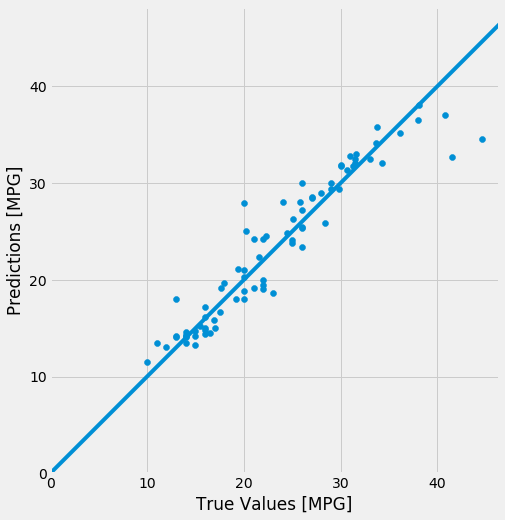

In [27]:
plt.scatter(y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [28]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)

rmse=np.sqrt(mean_squared_error(y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(y_test,prediction))

RMSE:  2.523461488840076
R_square: 0.8975492618663522


In [29]:
model.save("model.h5")